# 1. Setup

## 1.1  Installing Necessary Libraries

In [ ]:
!pip install git+https://github.com/FacePerceiver/facer.git@main
!pip install timm

  Cloning https://github.com/FacePerceiver/facer.git (to revision main) to /tmp/pip-req-build-myferfes
  Running command git clone --filter=blob:none --quiet https://github.com/FacePerceiver/facer.git /tmp/pip-req-build-myferfes
  Encountered 16 file(s) that should have been pointers, but weren't:
        samples/data/fire.webp
        samples/data/girl.jpg
        samples/data/sideface.jpg
        samples/data/twogirls.jpg
        samples/data/weirdface.jpg
        samples/data/weirdface2.jpg
        samples/data/weirdface3.jpg
        samples/download.ipynb
        samples/example_output/alignment.png
        samples/example_output/detect.png
        samples/example_output/parsing.png
        samples/face_alignment.ipynb
        samples/face_attribute.ipynb
        samples/face_detect.ipynb
        samples/face_parsing.ipynb
        samples/transform.ipynb
  Resolved https://github.com/FacePerceiver/facer.git to commit b2e4fcb94fa8db7cff1a053b6c6441131274c074
  Preparing metadata (se

In [ ]:
!git clone https://github.com/FacePerceiver/facer.git

fatal: destination path 'facer' already exists and is not an empty directory.


In [ ]:
pip install tensorflow-addons

In [ ]:
pip install keras-tuner

In [ ]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-m83nyisz
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /tmp/pip-req-build-m83nyisz
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20026 sha256=e4e2eb616879cfe8daca2da6e3ab8b18597f49259c92a1389cb0f96641b0ba55
  Stored in directory: /tmp/pip-ephem-wheel-cache-e12nnad_/wheels/f5/13/cb/b1dbd79043c5a389742e422859b0b663adcd7b5c220928c339
Successfully built image-classifiers


In [ ]:
!pip install joblib

## 1.2 Importing Libraries

In [ ]:
from google.colab import drive
import os
from PIL import Image, ImageEnhance, ImageFilter
import shutil
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import facer
from torchvision.transforms.functional import to_pil_image, to_tensor
from torch import nn, optim
from torchvision import models
import torch.nn.functional as F
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR
import cupy as cp
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score
from torchsummary import summary
import seaborn as sns
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from torch.optim import Adam
from collections import defaultdict
import random
from sklearn.model_selection import train_test_split
import itertools
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, BatchNormalization, ReLU, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical
from kerastuner import RandomSearch, Hyperband, Objective
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from keras_tuner.tuners import RandomSearch
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score as f1_metric
import keras_tuner as kt
from tensorflow.keras.applications import VGG16
from keras_tuner import HyperParameters
from tensorflow.keras.regularizers import l2
from classification_models.tfkeras import Classifiers
from joblib import dump, load

# 2. Data Loading

## 2.1  Load each dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
SkinTone_Dataset_Path = '/content/drive/MyDrive/Senior Project/Dataset/Skin Tone Dataset' # SkinTone Dataset

# 3. Data Preprocessing

## 3.1 EDA, cleaning, and splitting.

In [ ]:
def convert_to_jpg(directory):
    # Walk through all files and subdirectories in the directory
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            if not filepath.lower().endswith('.jpg'):
                try:
                    img = Image.open(filepath)
                    # Define the new filename with .jpg extension
                    new_filepath = os.path.splitext(filepath)[0] + '.jpg'
                    # Convert and save the image under the new file name
                    img.convert('RGB').save(new_filepath, 'JPEG')
                    # Remove the original file and keep the .jpg version
                    os.remove(filepath)
                    print(f"Converted and saved {new_filepath}")
                except Exception as e:
                    print(f"Failed to convert {filepath}: {e}")

#convert_to_jpg(SkinTone_Dataset_Path)

In [ ]:
def rename_images(dataset_path):
    img_index = 1  # Initialize the counter outside the loop to continue incrementing
    for subdir, dirs, files in os.walk(dataset_path):
        class_name = os.path.basename(subdir)  # Get the class name from the directory name
        if class_name:
            print(f"Processing {subdir}...")
            for file in files:
                filepath = os.path.join(subdir, file)
                if filepath.lower().endswith('.jpg'):
                    new_filename = f"{img_index}_{class_name}.jpg"
                    new_filepath = os.path.join(subdir, new_filename)
                    try:
                        os.rename(filepath, new_filepath)  # Rename the file
                        print(f"Renamed {filepath} to {new_filepath}")
                        img_index += 1  # Increment the index for each file processed
                    except Exception as e:
                        print(f"Failed to rename {filepath}: {e}")
                else:
                    print(f"Skipped {filepath} (not a .jpg)")

#rename_images(SkinTone_Dataset_Path)

In [ ]:
def collect_images(base_path):
    all_images = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                all_images.append(os.path.join(root, file))
    return all_images

In [ ]:
class SkinToneDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        self.class_to_index = {class_name: index for index, class_name in enumerate(sorted(set(labels)))}

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        label = self.class_to_index[self.labels[idx]]  # Convert class name to integer
        return image, label

    def __len__(self):
        return len(self.image_paths)

In [ ]:
def get_train_transforms():
    """Define and return a series of transformations for the training set."""
    return transforms.Compose([
        transforms.Resize((256, 256)),  # Resize all images to the same size
        transforms.ToTensor(),  # Convert images to tensor
    ])

def get_val_test_transforms():
    """Define and return a series of transformations for the validation and test set."""
    return transforms.Compose([
        transforms.Resize((256, 256)),  # resize to ensure consistency
        transforms.ToTensor(),  # Convert to tensor for model compatibility
    ])


In [ ]:
def get_label_from_filename(image_path):
    # Split the filename and extract the class part
    filename = os.path.basename(image_path)
    label = filename.split('_')[1].split('.')[0]
    return label

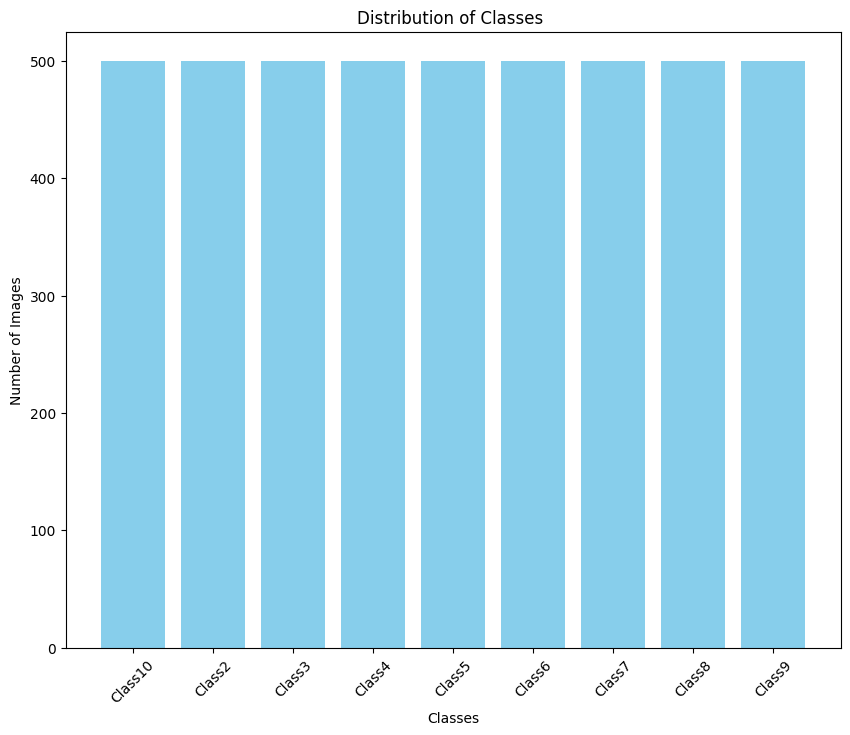

In [ ]:
def plot_class_distribution(base_path, start_class=1, end_class=9):
    class_counts = {}
    classes = sorted(os.listdir(base_path))[start_class-1:end_class]

    for class_name in classes:
        class_dir = os.path.join(base_path, class_name)
        class_counts[class_name] = len(os.listdir(class_dir))

    plt.figure(figsize=(10, 8))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Classes ')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(SkinTone_Dataset_Path)

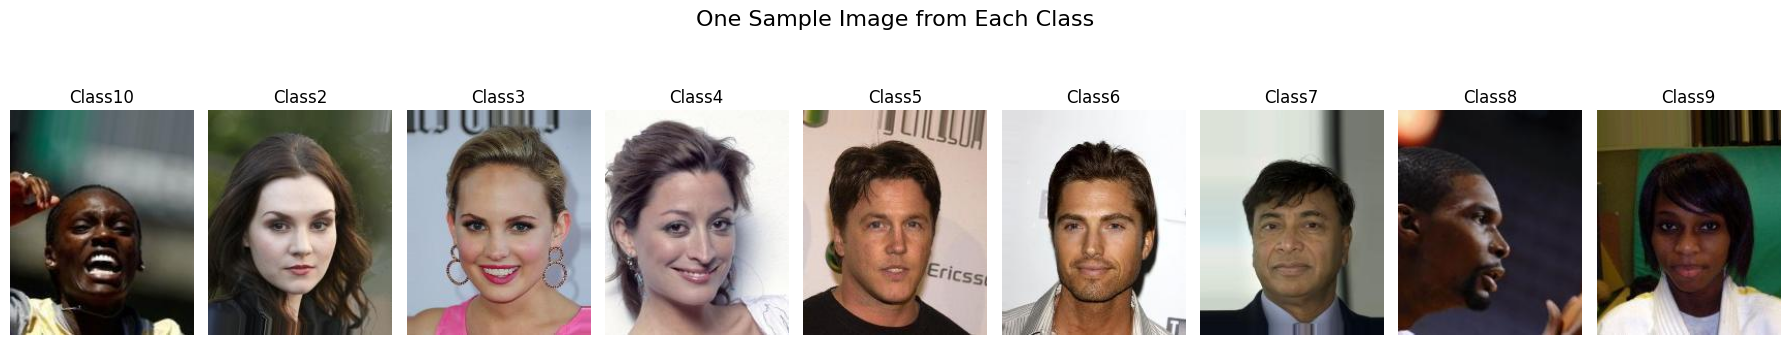

In [ ]:
def display_sample_images(base_path, start_class=1, end_class=9):
    classes = sorted(os.listdir(base_path))  # Sort and list all classes
    selected_classes = classes[start_class-1:end_class]  # Select classes from 1 to 9
    num_classes = len(selected_classes)
    fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(num_classes * 2, 4))
    fig.suptitle('One Sample Image from Each Class', fontsize=16)

    for i, class_name in enumerate(selected_classes):
        class_dir = os.path.join(base_path, class_name)
        sample_image = np.random.choice(os.listdir(class_dir), 1)[0]  # Randomly pick one sample image
        img_path = os.path.join(class_dir, sample_image)
        img = Image.open(img_path).convert('RGB')
        ax = axes[i]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_name)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

display_sample_images(SkinTone_Dataset_Path)

In [ ]:
processed_images_dir = '/content/drive/MyDrive/Senior Project/Dataset/processed_images'
os.makedirs(processed_images_dir, exist_ok=True)

### Step 1: Set up the device and initialize face detection and parsing

```
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
face_detector = facer.face_detector('retinaface/mobilenet', device=device)
face_parser = facer.face_parser('farl/lapa/448', device=device)
```



### Step 2: Collect all image paths

```
all_images = collect_images(SkinTone_Dataset_Path)
```


### Step 3: Process images to detect and parse faces

```
processed_images = []
dataset_path = SkinTone_Dataset_Path

for image_path in all_images:
    image_name = os.path.basename(image_path)
    image_data = facer.read_hwc(image_path)  # Check what type of data this function returns

    if image_data is None:
        print(f"Could not read image {image_name}")
        continue

    # Check if the data is a tensor and adjust dimensions for PyTorch if needed
    if torch.is_tensor(image_data):
        # Assuming image_data is already in CHW format but check your facer.read_hwc() function documentation
        if image_data.shape[0] != 3:  # Expecting C, H, W format, C should be 3 for RGB
            image_tensor = image_data.permute(2, 0, 1)  # Convert from HWC to CHW if necessary
        else:
            image_tensor = image_data
        image_tensor = image_tensor.unsqueeze(0).to(device)  # Add batch dimension and move to device
    elif isinstance(image_data, np.ndarray):
        # If it's a numpy array, convert to tensor
        image_tensor = torch.from_numpy(image_data.astype('float32')).permute(2, 0, 1).unsqueeze(0).to(device)
    else:
        print(f"Unknown data type for image {image_name}: {type(image_data)}")
        continue

    with torch.inference_mode():
        try:
            faces = face_detector(image_tensor)  # Pass the correctly shaped tensor to the face detector

            if faces:
                parsed_faces = face_parser(image_tensor, faces)

                if 'seg' in parsed_faces:
                    seg_logits = parsed_faces['seg']['logits']
                    seg_probs = torch.sigmoid(seg_logits)
                    binary_mask = seg_probs[0, 1, :, :] > 0.5  # Accessing first image, second channel
                    binary_mask = binary_mask.cpu().numpy()

                    # Create a 3-channel binary mask for the RGB image
                    binary_mask_3d = np.repeat(binary_mask[:, :, np.newaxis], 3, axis=2)

                    # Apply the mask to the original image to extract the skin region
                    skin_region = image_data.cpu().numpy() * binary_mask_3d  # Convert tensor to numpy if needed

                    # Convert the result to uint8 format for saving as an image
                    skin_region_uint8 = skin_region.astype(np.uint8)

                    # Save the processed skin region image to disk
                    processed_image_path = os.path.join(processed_images_dir, image_name)
                    Image.fromarray(skin_region_uint8).save(processed_image_path)

                    # Add the path of the saved image to processed_images
                    processed_images.append(processed_image_path)
        except RuntimeError as e:
            print(f"Error processing {image_name}: {str(e)}")
```

In [ ]:
def stratified_split_dataset(all_images, train_size=0.8, val_size=0.1, test_size=0.1):
    """Split the dataset into training, validation, and testing sets in a stratified manner."""
    label_to_images = {}
    for image in all_images:
        label = get_label_from_filename(image)
        if label in label_to_images:
            label_to_images[label].append(image)
        else:
            label_to_images[label] = [image]

    train_images = []
    val_images = []
    test_images = []
    train_labels = []
    val_labels = []
    test_labels = []

    for label, images in label_to_images.items():
        np.random.shuffle(images)
        total_images = len(images)
        train_end = int(train_size * total_images)
        val_end = train_end + int(val_size * total_images)

        train_images.extend(images[:train_end])
        val_images.extend(images[train_end:val_end])
        test_images.extend(images[val_end:])

        # Append corresponding labels
        train_labels.extend([label] * len(images[:train_end]))
        val_labels.extend([label] * len(images[train_end:val_end]))
        test_labels.extend([label] * len(images[val_end:]))

    return (train_images, train_labels), (val_images, val_labels), (test_images, test_labels)

In [ ]:
# Step 4: Split the processed images
processed_images = collect_images(processed_images_dir)
(train_images, train_labels), (val_images, val_labels), (test_images, test_labels) = stratified_split_dataset(processed_images)


# Step 5: Define transformations for datasets
train_transforms = get_train_transforms()
val_test_transforms = get_val_test_transforms()

# Step 6: Create datasets with the face detector and parser
train_dataset = SkinToneDataset(train_images, train_labels, transform=train_transforms)
val_dataset = SkinToneDataset(val_images, val_labels, transform=val_test_transforms)
test_dataset = SkinToneDataset(test_images, test_labels, transform=val_test_transforms)

# Step 7: Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
print(f"Total processed images: {len(processed_images)}")
print(f"Training images: {len(train_images)}")
print(f"Validation images: {len(val_images)}")
print(f"Testing images: {len(test_images)}")

Total processed images: 4500
Training images: 3600
Validation images: 450
Testing images: 450


In [ ]:
def count_labels(image_paths):
    """Count occurrences of each label in a list of image paths."""
    label_count = {}
    for path in image_paths:
        label = get_label_from_filename(path)
        if label in label_count:
            label_count[label] += 1
        else:
            label_count[label] = 1
    return label_count

train_counts = count_labels(train_images)
val_counts = count_labels(val_images)
test_counts = count_labels(test_images)

print("Training set counts:")
for label, count in train_counts.items():
    print(f"Label: {label}, Count: {count}")

print("\nValidation set counts:")
for label, count in val_counts.items():
    print(f"Label: {label}, Count: {count}")

print("\nTest set counts:")
for label, count in test_counts.items():
    print(f"Label: {label}, Count: {count}")

Training set counts:
Label: Class4, Count: 400
Label: Class6, Count: 400
Label: Class10, Count: 400
Label: Class9, Count: 400
Label: Class5, Count: 400
Label: Class3, Count: 400
Label: Class7, Count: 400
Label: Class2, Count: 400
Label: Class8, Count: 400

Validation set counts:
Label: Class4, Count: 50
Label: Class6, Count: 50
Label: Class10, Count: 50
Label: Class9, Count: 50
Label: Class5, Count: 50
Label: Class3, Count: 50
Label: Class7, Count: 50
Label: Class2, Count: 50
Label: Class8, Count: 50

Test set counts:
Label: Class4, Count: 50
Label: Class6, Count: 50
Label: Class10, Count: 50
Label: Class9, Count: 50
Label: Class5, Count: 50
Label: Class3, Count: 50
Label: Class7, Count: 50
Label: Class2, Count: 50
Label: Class8, Count: 50


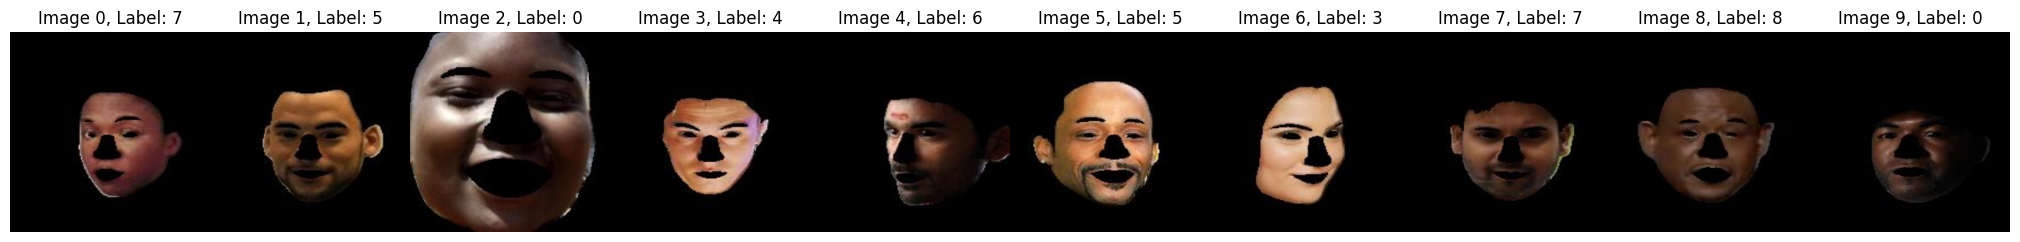

In [ ]:
def plot_images_from_loader(loader, num_images):
    dataiter = iter(loader)
    images, labels = next(dataiter)

    figure_width = num_images * 2
    figure_height = 3
    fig = plt.figure(figsize=(figure_width, figure_height))

    for i in range(num_images):
        if i >= images.size(0):
            break

        left = i / num_images
        bottom = 0.1
        width = 1 / num_images
        height = 0.8
        ax = fig.add_axes([left, bottom, width, height])

        img = to_pil_image(images[i])
        ax.imshow(img)
        ax.set_title(f'Image {i}, Label: {labels[i]}')
        ax.axis('off')

    plt.show()

plot_images_from_loader(train_loader, num_images=10)

####Here is after reducing the number of classes from 9 to 4

In [ ]:
def reorganize_dataset(source_dir, target_dir, class_mapping):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # a dictionary to hold the image paths for each new class
    new_class_images = defaultdict(list)

    # Iterate over all files in the source directory
    for filename in os.listdir(source_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            # Extract class from filename, stripping non-numeric characters
            class_label = ''.join(filter(str.isdigit, filename.split('_')[1]))
            # Determine new class based on mapping
            for new_class, old_classes in class_mapping.items():
                if int(class_label) in old_classes:
                    new_class_images[new_class].append(os.path.join(source_dir, filename))
                    break

    # For each new class, copy images until we reach the desired number
    for new_class, images in new_class_images.items():
        class_dir = os.path.join(target_dir, str(new_class))
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

        # Randomize the image list and copy the first 1000
        random.shuffle(images)
        for i in range(min(1000, len(images))):
            shutil.copy2(images[i], class_dir)

# Mapping of original classes to new classes
class_mapping = {
    '1': [2, 3, 4],
    '2': [5, 6],
    '3': [7, 8],
    '4': [9, 10],
}

source_dataset_folder = processed_images_dir
target_dataset_folder = '/content/drive/MyDrive/Senior Project/Dataset/reorganized_dataset'
os.makedirs(target_dataset_folder, exist_ok=True)

#reorganize_dataset(source_dataset_folder, target_dataset_folder, class_mapping)


In [ ]:
def rename_images_in_folders(target_dataset_folder):

    for class_folder in os.listdir(target_dataset_folder):
        class_folder_path = os.path.join(target_dataset_folder, class_folder)
        if os.path.isdir(class_folder_path):
            # New class is determined by the folder name
            new_class_label = class_folder

            # Rename each image in the class folder
            for filename in os.listdir(class_folder_path):
                if filename.endswith(('.png', '.jpg', '.jpeg')):

                    parts = filename.split('_')
                    # Check if there are sufficient parts to rename
                    if len(parts) == 2:
                        prefix = parts[0]
                        suffix = parts[1]
                        # Split the second part to isolate the extension
                        class_and_extension = suffix.split('.')
                        if len(class_and_extension) == 2:
                            extension = class_and_extension[1]
                            # Construct new filename using new class label and extension
                            new_filename = f"{prefix}_{new_class_label}.{extension}"
                            old_path = os.path.join(class_folder_path, filename)
                            new_path = os.path.join(class_folder_path, new_filename)
                            print(f"Renaming {old_path} to {new_path}")  # Debugging output
                            os.rename(old_path, new_path)
                        else:
                            print(f"Error parsing extension from {filename}")
                    else:
                        print(f"Unexpected filename structure: {filename}")
                else:
                    print(f"Skipping file due to incorrect format: {filename}")


#rename_images_in_folders(target_dataset_folder)


In [ ]:
def stratified_split_dataset_after_red_classes(root_dir, train_size=0.8, val_size=0.1, test_size=0.1):
    """
    Split the dataset into training, validation, and testing sets in a stratified manner
    after the classes have been reduced and organized into folders.
    """
    label_to_images = {}
    train_images, val_images, test_images = [], [], []
    train_labels, val_labels, test_labels = [], [], []

    # Collect all image paths and their labels
    for label in os.listdir(root_dir):
        label_path = os.path.join(root_dir, label)
        if os.path.isdir(label_path):  # to make sure it's a directory
            images = [os.path.join(label_path, img) for img in os.listdir(label_path)
                      if img.endswith(('.png', '.jpg', '.jpeg'))]
            label_to_images[label] = images

    # Split the images for each label
    for label, images in label_to_images.items():

        X_train, X_val_test = train_test_split(images, train_size=train_size, stratify=None, random_state=42)
        X_val, X_test = train_test_split(X_val_test, train_size=val_size / (val_size + test_size), stratify=None, random_state=42)

        train_images.extend(X_train)
        val_images.extend(X_val)
        test_images.extend(X_test)

        # Append corresponding labels
        train_labels.extend([label] * len(X_train))
        val_labels.extend([label] * len(X_val))
        test_labels.extend([label] * len(X_test))

    return (train_images, train_labels), (val_images, val_labels), (test_images, test_labels)

In [ ]:
# Split the processed images
target_dataset_folder = '/content/drive/MyDrive/Senior Project/Dataset/reorganized_dataset'
dir_AfterRedClasses = target_dataset_folder
(train_images2, train_labels2), (val_images2, val_labels2), (test_images2, test_labels2) = stratified_split_dataset_after_red_classes(dir_AfterRedClasses)


# Define transformations for datasets
train_transforms = get_train_transforms()
val_test_transforms = get_val_test_transforms()

# Create datasets with the face detector and parser

train_dataset2 = SkinToneDataset(train_images2, train_labels2, transform=train_transforms)
val_dataset2 = SkinToneDataset(val_images2, val_labels2, transform=val_test_transforms)
test_dataset2 = SkinToneDataset(test_images2, test_labels2, transform=val_test_transforms)

# Create DataLoaders
train_loader2 = DataLoader(train_dataset2, batch_size=32, shuffle=True)
val_loader2 = DataLoader(val_dataset2, batch_size=32, shuffle=False)
test_loader2 = DataLoader(test_dataset2, batch_size=32, shuffle=False)

In [ ]:
print(f"Total processed images: {len(train_images2)+len(val_images2)+len(test_images2)}")
print(f"Training images: {len(train_images2)}")
print(f"Validation images: {len(val_images2)}")
print(f"Testing images: {len(test_images2)}")

Total processed images: 4000
Training images: 3200
Validation images: 400
Testing images: 400


In [ ]:
def count_labels2(image_paths):
    """Count occurrences of each label in a list of image paths."""
    label_count = defaultdict(int)
    for path in image_paths:
        # Extract the class label from the filename
        filename = os.path.basename(path)
        label = filename.split('_')[1]
        label_count[label] += 1
    return label_count

train_counts2 = count_labels2(train_images2)
val_counts = count_labels2(val_images2)
test_counts = count_labels2(test_images2)

print("Training set counts:")
for label, count in train_counts2.items():
    print(f"Label: {label}, Count: {count}")

print("\nValidation set counts:")
for label, count in val_counts.items():
    print(f"Label: {label}, Count: {count}")

print("\nTest set counts:")
for label, count in test_counts.items():
    print(f"Label: {label}, Count: {count}")

Training set counts:
Label: 1.jpg, Count: 800
Label: 2.jpg, Count: 800
Label: 4.jpg, Count: 800
Label: 3.jpg, Count: 800

Validation set counts:
Label: 1.jpg, Count: 100
Label: 2.jpg, Count: 100
Label: 4.jpg, Count: 100
Label: 3.jpg, Count: 100

Test set counts:
Label: 1.jpg, Count: 100
Label: 2.jpg, Count: 100
Label: 4.jpg, Count: 100
Label: 3.jpg, Count: 100


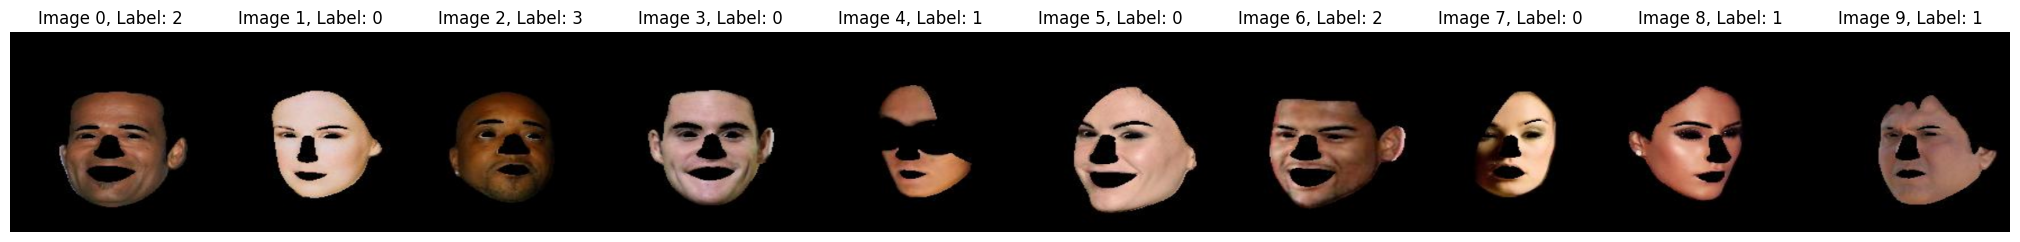

In [ ]:
plot_images_from_loader(train_loader2, num_images=10)

In [ ]:
def load_images_and_labels(image_paths, labels, target_size):
    images = []
    label_indices = []
    unique_labels = sorted(set(labels))
    num_classes = len(unique_labels)
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

    for image_path, label in zip(image_paths, labels):
        img = Image.open(image_path).convert('RGB')
        img = img.resize(target_size)
        images.append(np.array(img))
        label_indices.append(label_to_index[label])  # store the label index in a separate list

    images = np.array(images, dtype='float32') / 255.0
    label_indices = np.array(label_indices, dtype='int32')
    labels = to_categorical(label_indices, num_classes=num_classes)
    return images, labels

# 4. Model Training and Evaluation

## 4.1 Define model architecture, train on datasets.

### 4.1.1 First model (CNN: ResNet architecture "Transfer Learning")

In [ ]:
(train_images2, train_labels2), (val_images2, val_labels2), (test_images2, test_labels2) = stratified_split_dataset_after_red_classes(dir_AfterRedClasses)
X_train, Y_train = load_images_and_labels(train_images2, train_labels2, target_size=(128, 128))
X_val, Y_val = load_images_and_labels(val_images2, val_labels2, target_size=(128, 128))

####ResNet50

#####hyperparameter tuning

In [ ]:
def build_model(hp):
    base_model = ResNet50(include_top=False, input_shape=(128, 128, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    # Apply L2 regularization to the new Dense layer
    x = Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', kernel_regularizer=l2(0.01))(x)
    predictions = Dense(4, activation='softmax', kernel_regularizer=l2(0.01))(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall(), tfa.metrics.F1Score(num_classes=4, average='macro')])
    return model

In [ ]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3
)

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hyperparam_tuning'
)

tuner.search(
    x=X_train,
    y=Y_train,
    epochs=10,
    validation_data=(X_val, Y_val),
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=2), lr_scheduler]
)
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best model summary:")
best_model.summary()
print("Best hyperparameters:", best_hyperparameters.values)

Trial 20 Complete [00h 00m 56s]
val_accuracy: 0.25999999046325684

Best val_accuracy So Far: 0.5249999761581421
Total elapsed time: 00h 18m 06s
Best model summary:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  

#####Train with best hyperparameters

In [ ]:
def rebuild_best_model(best_hyperparameters):
    hp = HyperParameters()
    hp.Int('units', min_value=32, max_value=512, step=32, default=best_hyperparameters['units'])
    model = build_model(hp)
    return model
# Rebuild the best model
best_hyperparameters= {'units': 480, 'learning_rate': 1.4547542034522853e-05}
best_model = rebuild_best_model(best_hyperparameters)

In [ ]:
# Configure the callbacks
early_stopper = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1
)

# Fit the model with a larger number of epochs
history = best_model.fit(
    x=X_train,
    y=Y_train,
    epochs=50,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopper, lr_scheduler]
)


Epoch 1/50
100/100 [==============================] - 39s 70ms/step - loss: 8.7855 - accuracy: 0.5859 - precision_6: 0.7155 - recall_6: 0.4087 - f1_score: 0.5710 - val_loss: 9.1831 - val_accuracy: 0.2500 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_f1_score: 0.1002 - lr: 1.0000e-05
Epoch 2/50
100/100 [==============================] - 5s 53ms/step - loss: 8.2336 - accuracy: 0.7972 - precision_6: 0.8537 - recall_6: 0.7169 - f1_score: 0.7977 - val_loss: 9.0714 - val_accuracy: 0.2475 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_f1_score: 0.1000 - lr: 1.0000e-05
Epoch 3/50
100/100 [==============================] - 5s 53ms/step - loss: 7.9726 - accuracy: 0.8647 - precision_6: 0.8970 - recall_6: 0.8166 - f1_score: 0.8647 - val_loss: 8.8943 - val_accuracy: 0.3400 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_f1_score: 0.2697 - lr: 1.0000e-05
Epoch 4/50
100/100 [==============================] - 5s 54ms/step - loss: 7.7128 - accuracy: 0.925

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision_6', 'recall_6', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision_6', 'val_recall_6', 'val_f1_score', 'lr'])


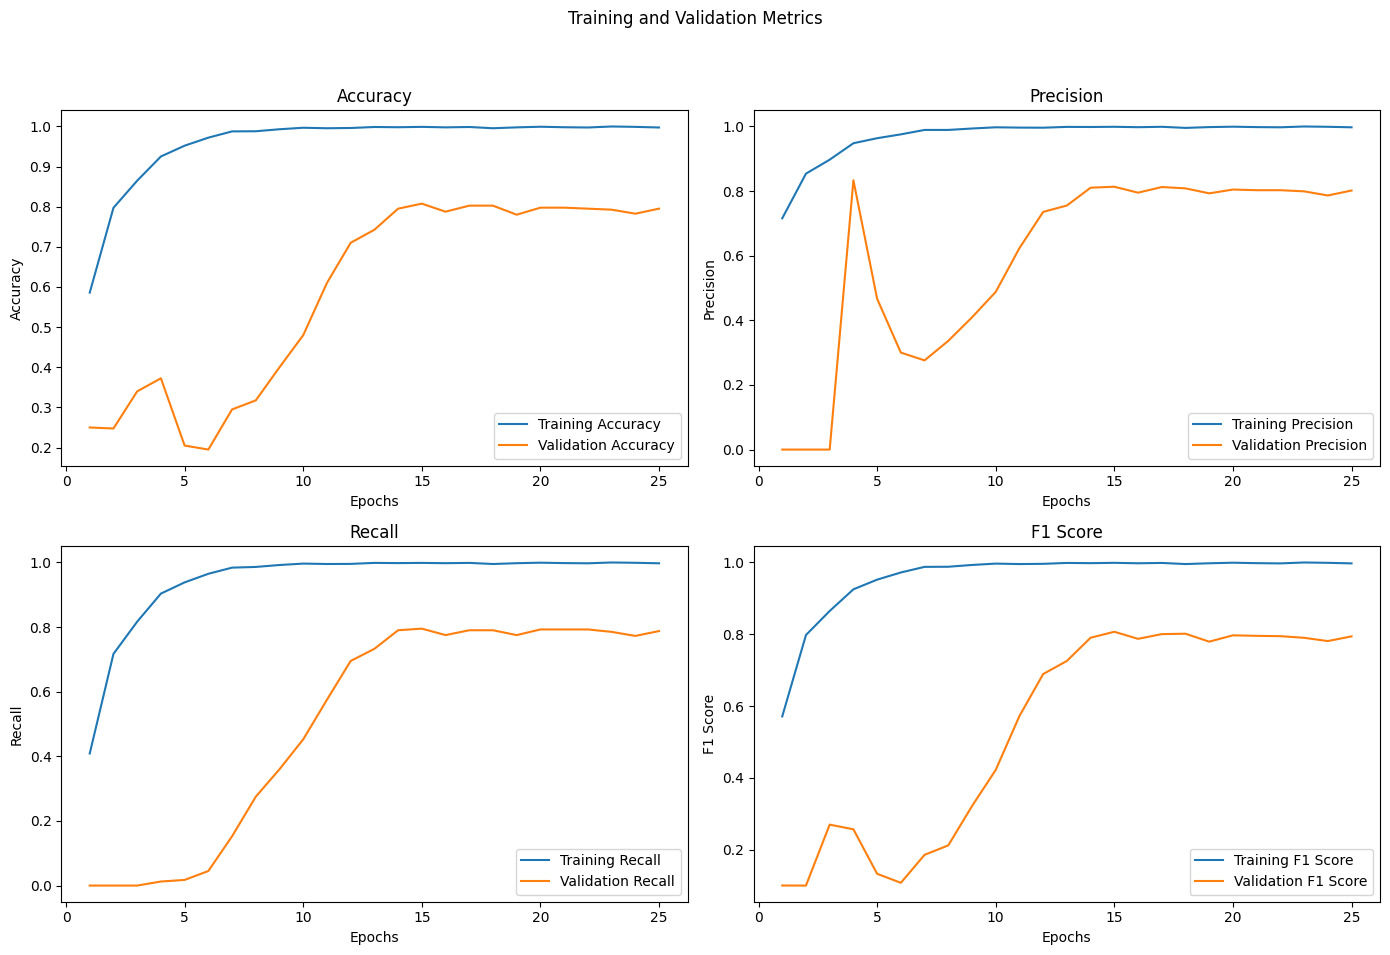

In [ ]:
# Retrieve metrics data using the correct keys
accuracy = history.history.get('accuracy', [])
val_accuracy = history.history.get('val_accuracy', [])
precision = history.history.get('precision_6', [])  # Updated to match the key
val_precision = history.history.get('val_precision_6', [])
recall = history.history.get('recall_6', [])  # Updated to match the key
val_recall = history.history.get('val_recall_6', [])
f1_score = history.history.get('f1_score', [])
val_f1_score = history.history.get('val_f1_score', [])

# Determine the range of epochs
epochs_range = range(1, len(accuracy) + 1)

plt.figure(figsize=(14, 10))
plt.suptitle('Training and Validation Metrics')

# Plot accuracy
if accuracy and val_accuracy:
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

# Plot precision
if precision and val_precision:
    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, precision, label='Training Precision')
    plt.plot(epochs_range, val_precision, label='Validation Precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

# Plot recall
if recall and val_recall:
    plt.subplot(2, 2, 3)
    plt.plot(epochs_range, recall, label='Training Recall')
    plt.plot(epochs_range, val_recall, label='Validation Recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

# Plot F1-score
if f1_score and val_f1_score:
    plt.subplot(2, 2, 4)
    plt.plot(epochs_range, f1_score, label='Training F1 Score')
    plt.plot(epochs_range, val_f1_score, label='Validation F1 Score')
    plt.title('F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#####Evaluate the model

In [ ]:
X_test, Y_test = load_images_and_labels(test_images2, test_labels2, target_size=(128, 128))
scores = best_model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")
print(f"Test Precision: {scores[2]}")
print(f"Test Recall: {scores[3]}")
print(f"Test F1 Score (Macro): {scores[4]}")
if len(scores) > 5:
    print(f"Test F1 Score (Micro): {scores[5]}")
if len(scores) > 6:
    print(f"Test F1 Score (Weighted): {scores[6]}")

13/13 [==============================] - 0s 17ms/step - loss: 6.4590 - accuracy: 0.7650 - precision_6: 0.7735 - recall_6: 0.7600 - f1_score: 0.7628
Test Loss: 6.459008693695068
Test Accuracy: 0.7649999856948853
Test Precision: 0.7735369205474854
Test Recall: 0.7599999904632568
Test F1 Score (Macro): 0.7627942562103271


13/13 [==============================] - 1s 13ms/step


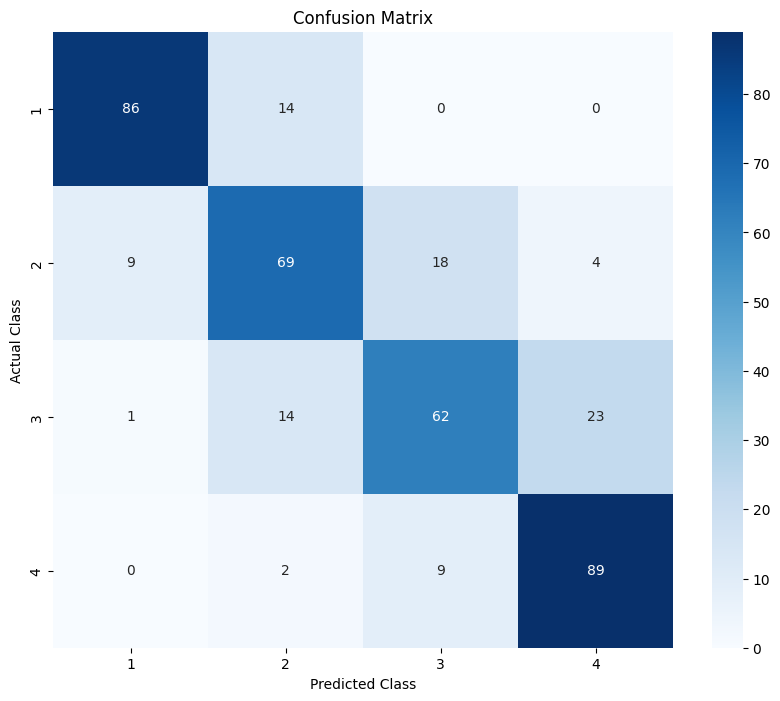

In [ ]:
predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
class_names=['1','2','3','4']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#####Save the model

In [ ]:
model_path = "/content/drive/My Drive/modelResNet50.h5"
best_model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


####ResNet18

#####Train with best hyperparameters

In [ ]:
ResNet18, preprocess_input = Classifiers.get('resnet18')

model = ResNet18(input_shape=(128, 128, 3), weights='imagenet', include_top=False)


x = GlobalAveragePooling2D()(model.output)
x = Dense(480, activation='relu', kernel_regularizer=l2(0.01))(x)  # Apply L2 regularization here
predictions = Dense(4, activation='softmax', kernel_regularizer=l2(0.01))(x)  # Also apply to the output layer

custom_model = Model(inputs=model.input, outputs=predictions)

custom_model.compile(
    optimizer=Adam(learning_rate=1.4547542034522853e-05),
    loss='categorical_crossentropy',
    metrics=['accuracy',Precision(), Recall(), tf.metrics.F1Score(average='macro')])

custom_model.summary()


Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 128, 128, 3)          9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d_72 (ZeroPad  (None, 134, 134, 3)          0         ['bn_data[0][0]']             
 ding2D)                                                                                          
                                                                                           

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    restore_best_weights=True  )

tf.config.run_functions_eagerly(True)
history = custom_model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=50,  # Maximum number of epochs
    batch_size=32,
    callbacks=[early_stopping]
)
tf.config.run_functions_eagerly(False)


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
100/100 [==============================] - 30s 300ms/step - loss: 6.0544 - accuracy: 0.5653 - precision_7: 0.6419 - recall_7: 0.4553 - f1_score: 0.5600 - val_loss: 6.3908 - val_accuracy: 0.2500 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_f1_score: 0.1000
Epoch 2/50
100/100 [==============================] - 30s 301ms/step - loss: 5.5136 - accuracy: 0.7763 - precision_7: 0.8246 - recall_7: 0.7053 - f1_score: 0.7751 - val_loss: 6.3902 - val_accuracy: 0.2500 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_f1_score: 0.1000
Epoch 3/50
100/100 [==============================] - 31s 306ms/step - loss: 5.3358 - accuracy: 0.8278 - precision_7: 0.8603 - recall_7: 0.7869 - f1_score: 0.8271 - val_loss: 6.3712 - val_accuracy: 0.2500 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_f1_score: 0.1000
Epoch 4/50
100/100 [==============================] - 30s 300ms/step - loss: 5.1663 - accuracy: 0.8791 - precision_7: 0.9015 - recall_7: 0.8497 -

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision_7', 'recall_7', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision_7', 'val_recall_7', 'val_f1_score'])


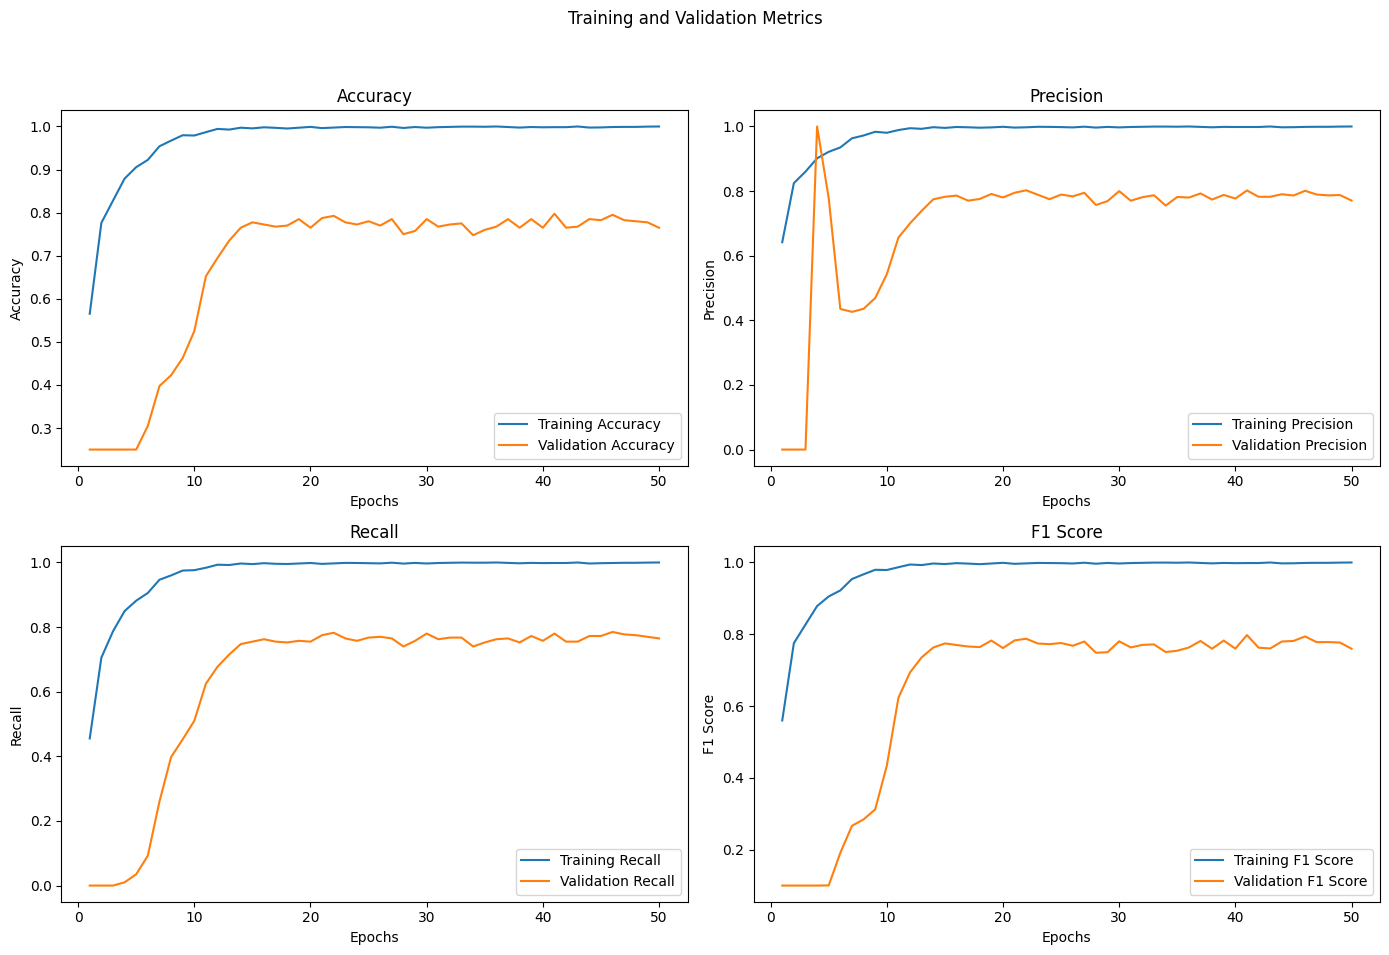

In [ ]:
# Retrieve metrics data using the correct keys
accuracy = history.history.get('accuracy', [])
val_accuracy = history.history.get('val_accuracy', [])
precision = history.history.get('precision_7', [])  # Updated to match the key
val_precision = history.history.get('val_precision_7', [])
recall = history.history.get('recall_7', [])  # Updated to match the key
val_recall = history.history.get('val_recall_7', [])
f1_score = history.history.get('f1_score', [])
val_f1_score = history.history.get('val_f1_score', [])

# Determine the range of epochs
epochs_range = range(1, len(accuracy) + 1)

plt.figure(figsize=(14, 10))
plt.suptitle('Training and Validation Metrics')

# Plot accuracy
if accuracy and val_accuracy:
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

# Plot precision
if precision and val_precision:
    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, precision, label='Training Precision')
    plt.plot(epochs_range, val_precision, label='Validation Precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

# Plot recall
if recall and val_recall:
    plt.subplot(2, 2, 3)
    plt.plot(epochs_range, recall, label='Training Recall')
    plt.plot(epochs_range, val_recall, label='Validation Recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

# Plot F1-score
if f1_score and val_f1_score:
    plt.subplot(2, 2, 4)
    plt.plot(epochs_range, f1_score, label='Training F1 Score')
    plt.plot(epochs_range, val_f1_score, label='Validation F1 Score')
    plt.title('F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#####Evaluate the model

In [ ]:
X_test, Y_test = load_images_and_labels(test_images2, test_labels2, target_size=(128, 128))
# Evaluate the model
performance = custom_model.evaluate(X_test, Y_test)
print(f"Test Loss: {performance[0]}")
print(f"Test Accuracy: {performance[1]}")
print(f"Test Precision: {performance[2]}")
print(f"Test Recall: {performance[3]}")
print(f"Test F1 Score: {performance[4]}")

13/13 [==============================] - 1s 94ms/step - loss: 1.7697 - accuracy: 0.8225 - precision_7: 0.8237 - recall_7: 0.8175 - f1_score: 0.8189
Test Loss: 1.7697404623031616
Test Accuracy: 0.8224999904632568
Test Precision: 0.8236775994300842
Test Recall: 0.8174999952316284
Test F1 Score: 0.8189089894294739


13/13 [==============================] - 1s 8ms/step


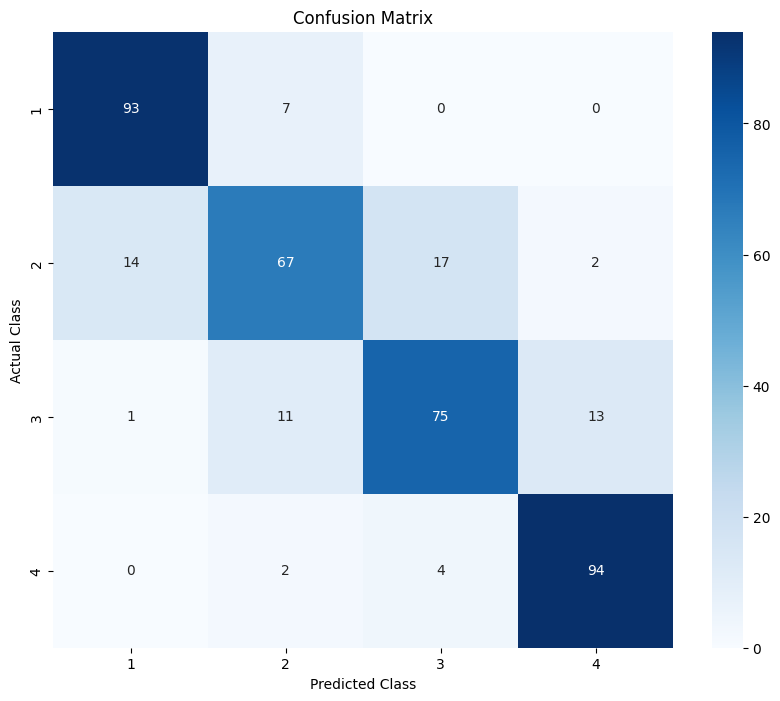

In [ ]:
predictions = custom_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
class_names=['1','2','3','4']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#####Save the model

In [ ]:
model_path = "/content/drive/My Drive/modelResNet18.h5"
best_model.save(model_path)

### 4.1.2 Second model (CNN: Simple architecture using Keras)

####hyperparameter tuning

In [ ]:
class ColorFocusLayer(Layer):
    def __init__(self, **kwargs):
        super(ColorFocusLayer, self).__init__(**kwargs)
        self.conv = None  # Conv layer will be set in build

    def build(self, input_shape):
        # Set the number of groups to a divisor of the number of input channels
        input_channels = input_shape[-1]
        possible_groups = [i for i in range(1, input_channels + 1) if input_channels % i == 0]
        chosen_group = max(possible_groups)  # Choose the largest divisor for better learning
        self.conv = Conv2D(input_channels, kernel_size=1, groups=chosen_group, padding='same')
        super(ColorFocusLayer, self).build(input_shape)

    def call(self, inputs):
        x = self.conv(inputs)
        x = tf.keras.activations.sigmoid(x)
        return inputs * x


def build_model(hp):
    filters_1 = hp.Int('conv_1_filters', min_value=32, max_value=128, step=32, default=64)
    model = Sequential([
        Conv2D(
            hp.Int('conv_1_filters', min_value=32, max_value=128, step=32, default=64),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5, 7], default=5),
            padding='same',
            activation='relu',
            input_shape=(128, 128, 3)),
        BatchNormalization(),
        ColorFocusLayer(),
        Conv2D(
            hp.Int('conv_2_filters', min_value=64, max_value=256, step=32, default=96),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5], default=3),
            padding='same',
            activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=2),
        Conv2D(
            hp.Int('conv_3_filters', min_value=128, max_value=256, step=32),
            kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
            padding='same',
            activation='relu'),
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Dense(
            hp.Int('dense_units', min_value=64, max_value=256, step=64),
            activation='relu'),
        Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(4, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(), Recall(), tfa.metrics.F1Score(num_classes=4, average='macro')]
    )

    return model

In [ ]:

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5
)

tuner = Hyperband(
    build_model,
    objective=Objective("val_accuracy", direction="max"),
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='hyperparam_tuning'
)

tuner.search(
    x=X_train,
    y=Y_train,
    epochs=10,
    validation_data=(X_val, Y_val),
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3), lr_scheduler]
)
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best model summary:")
best_model.summary()
print("Best hyperparameters:", best_hyperparameters.values)


Reloading Tuner from my_dir/hyperparam_tuning/tuner0.json
Best model summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     18944     
                                                                 
 batch_normalization (Batch  (None, 128, 128, 128)     512       
 Normalization)                                                  
                                                                 
 color_focus_layer (ColorFo  (None, 128, 128, 128)     256       
 cusLayer)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 96)      110688    
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 96)      384       
 chNormalization)                           

####Train with best hyperparameters

In [ ]:
def rebuild_best_model(best_hyperparameters):
    hp = best_hyperparameters
    model = build_model(hp)
    return model

# Rebuild the best model
best_model = rebuild_best_model(tuner.get_best_hyperparameters()[0])

In [ ]:
# Configure the callbacks
early_stopper = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1
)

# Fit the model with a larger number of epochs
history = best_model.fit(
    x=X_train,
    y=Y_train,
    epochs=50,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopper, lr_scheduler]
)


Epoch 1/50
100/100 [==============================] - 9s 67ms/step - loss: 0.7357 - accuracy: 0.6922 - precision_5: 0.7297 - recall_5: 0.6319 - f1_score: 0.6872 - val_loss: 6.5558 - val_accuracy: 0.4600 - val_precision_5: 0.4612 - val_recall_5: 0.4600 - val_f1_score: 0.3066 - lr: 0.0078
Epoch 2/50
100/100 [==============================] - 6s 61ms/step - loss: 0.6568 - accuracy: 0.7250 - precision_5: 0.7538 - recall_5: 0.6734 - f1_score: 0.7224 - val_loss: 3.3148 - val_accuracy: 0.4900 - val_precision_5: 0.4975 - val_recall_5: 0.4900 - val_f1_score: 0.3268 - lr: 0.0078
Epoch 3/50
100/100 [==============================] - 6s 61ms/step - loss: 0.6288 - accuracy: 0.7331 - precision_5: 0.7575 - recall_5: 0.6891 - f1_score: 0.7294 - val_loss: 1.2030 - val_accuracy: 0.5875 - val_precision_5: 0.6197 - val_recall_5: 0.5500 - val_f1_score: 0.5142 - lr: 0.0078
Epoch 4/50
100/100 [==============================] - 6s 61ms/step - loss: 0.6285 - accuracy: 0.7341 - precision_5: 0.7606 - recall_5: 0

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision_5', 'recall_5', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision_5', 'val_recall_5', 'val_f1_score', 'lr'])


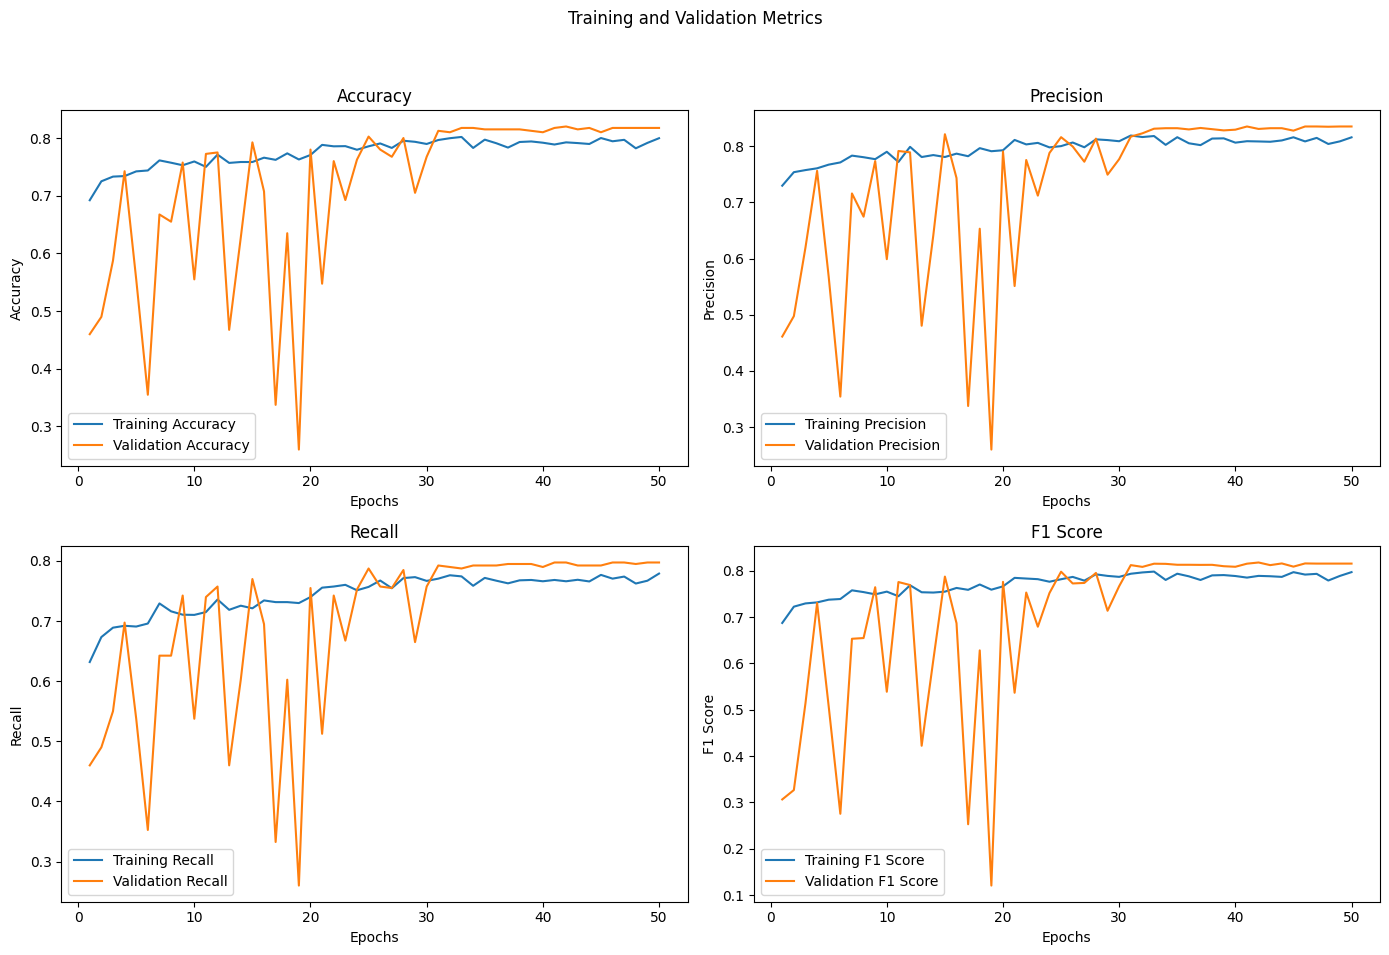

In [ ]:
# Retrieve metrics data using the correct keys
accuracy = history.history.get('accuracy', [])
val_accuracy = history.history.get('val_accuracy', [])
precision = history.history.get('precision_5', [])  # Updated to match the key
val_precision = history.history.get('val_precision_5', [])
recall = history.history.get('recall_5', [])  # Updated to match the key
val_recall = history.history.get('val_recall_5', [])
f1_score = history.history.get('f1_score', [])
val_f1_score = history.history.get('val_f1_score', [])

# Determine the range of epochs
epochs_range = range(1, len(accuracy) + 1)

plt.figure(figsize=(14, 10))
plt.suptitle('Training and Validation Metrics')

# Plot accuracy
if accuracy and val_accuracy:
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

# Plot precision
if precision and val_precision:
    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, precision, label='Training Precision')
    plt.plot(epochs_range, val_precision, label='Validation Precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

# Plot recall
if recall and val_recall:
    plt.subplot(2, 2, 3)
    plt.plot(epochs_range, recall, label='Training Recall')
    plt.plot(epochs_range, val_recall, label='Validation Recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

# Plot F1-score
if f1_score and val_f1_score:
    plt.subplot(2, 2, 4)
    plt.plot(epochs_range, f1_score, label='Training F1 Score')
    plt.plot(epochs_range, val_f1_score, label='Validation F1 Score')
    plt.title('F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


####Evaluate the model

In [ ]:
X_test, Y_test = load_images_and_labels(test_images2, test_labels2, target_size=(128, 128))
results = best_model.evaluate(X_test, Y_test, verbose=1)

print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")
print(f"Test Precision: {results[2]}")
print(f"Test Recall: {results[3]}")
print(f"Test F1 Score: {results[4]}")

13/13 [==============================] - 0s 20ms/step - loss: 0.4617 - accuracy: 0.8075 - precision_5: 0.8109 - recall_5: 0.7825 - f1_score: 0.8064
Test Loss: 0.4616686701774597
Test Accuracy: 0.8075000047683716
Test Precision: 0.8108808398246765
Test Recall: 0.7825000286102295
Test F1 Score: 0.8064080476760864


13/13 [==============================] - 0s 17ms/step


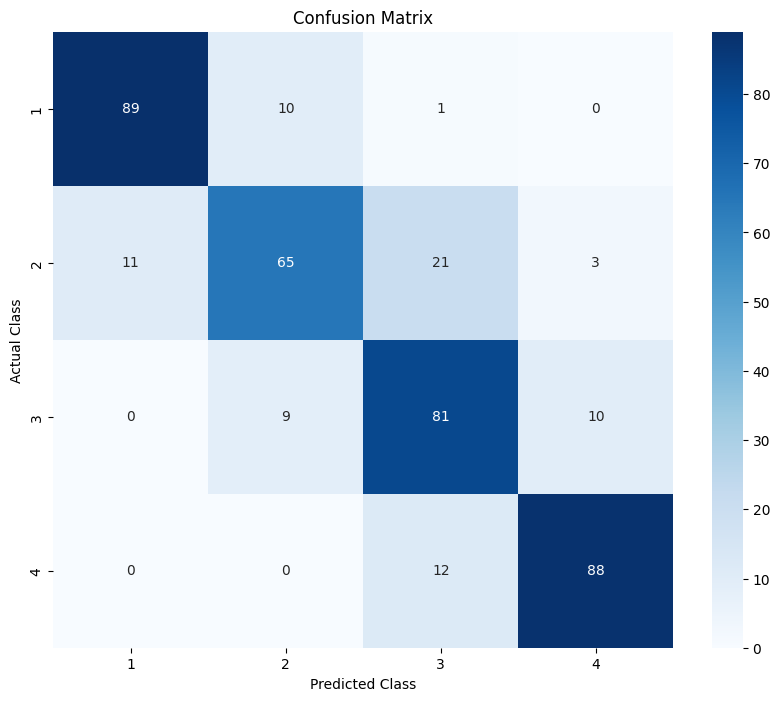

In [ ]:
predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
class_names=['1','2','3','4']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

####Save the model

In [ ]:
model_path = "/content/drive/My Drive/modelCNN2.h5"
best_model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 4.1.3 Third model (SVM)

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [ ]:
# Create a Support Vector Classifier
svm = SVC(probability=True)

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=3, verbose=2, scoring='accuracy')

In [ ]:
# Fit GridSearchCV
grid_search.fit(np.array(train_features), np.array(train_labels))

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=16.0min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=16.0min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=15.9min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 3.7min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 3.5min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 3.8min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=10.8min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=10.7min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=10.8min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=17.6min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=17.6min
[CV] END .......................C=0.1, gamma=0.

In [ ]:
# Train the model with the best parameters
best_svm = grid_search.best_estimator_

# Predict on the test set
predictions = best_svm.predict(np.array(test_features))

print(classification_report(test_labels, predictions))
print("Accuracy:", accuracy_score(test_labels, predictions))

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        # Flatten the output for feature extraction
        x = x.view(x.size(0), -1)
        return x

# Initialize the model
model_cnn = CustomCNN()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_cnn.to(device)
model_cnn.eval()

CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [ ]:
def extract_features(data_loader):
    features = []
    labels = []
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs = inputs.to(device)
            outputs = model_cnn(inputs)
            outputs = outputs.view(outputs.size(0), -1)  # Flatten the output
            features.append(outputs.cpu().numpy())
            labels.append(targets.numpy())
    features = np.concatenate(features, axis=0)
    labels = np.concatenate(labels, axis=0)
    return features, labels

In [ ]:
train_features, train_labels = extract_features(train_loader2)
val_features, val_labels = extract_features(val_loader2)
test_features, test_labels = extract_features(test_loader2)

In [ ]:
class_names = ['1', '2', '3', '4']

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

In [ ]:
svm_model = SVC(kernel='rbf', C=10, gamma=0.1)
svm_model.fit(train_features, train_labels)

SVC(C=10, gamma=0.1)

In [ ]:
# [ c 1, gamma 1]
# Predict on the training set
train_predictions = svm_model.predict(train_features)

# Evaluate on the training set
train_accuracy = accuracy_score(train_labels, train_predictions)
train_recall = recall_score(train_labels, train_predictions, average='macro')
train_precision = precision_score(train_labels, train_predictions, average='macro')
train_f1 = f1_metric(train_labels, train_predictions, average='macro')

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training Recall: {train_recall:.4f}')
print(f'Training Precision: {train_precision:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

# Predict on the validation set
val_predictions = svm_model.predict(val_features)

# Evaluate on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
val_recall = recall_score(val_labels, val_predictions, average='macro')
val_precision = precision_score(val_labels, val_predictions, average='macro')
val_f1 = f1_metric(val_labels, val_predictions, average='macro')

print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation Recall: {val_recall:.4f}')
print(f'Validation Precision: {val_precision:.4f}')
print(f'Validation F1 Score: {val_f1:.4f}')

# Predict on the test set
test_predictions = svm_model.predict(test_features)

# Evaluate on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
test_recall = recall_score(test_labels, test_predictions, average='macro')
test_precision = precision_score(test_labels, test_predictions, average='macro')
test_f1 = f1_metric(test_labels, test_predictions, average='macro')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Training Accuracy: 0.8781
Training Recall: 0.8781
Training Precision: 0.8782
Training F1 Score: 0.8774
Validation Accuracy: 0.7900
Validation Recall: 0.7900
Validation Precision: 0.7861
Validation F1 Score: 0.7861
Test Accuracy: 0.7825
Test Recall: 0.7825
Test Precision: 0.7828
Test F1 Score: 0.7821


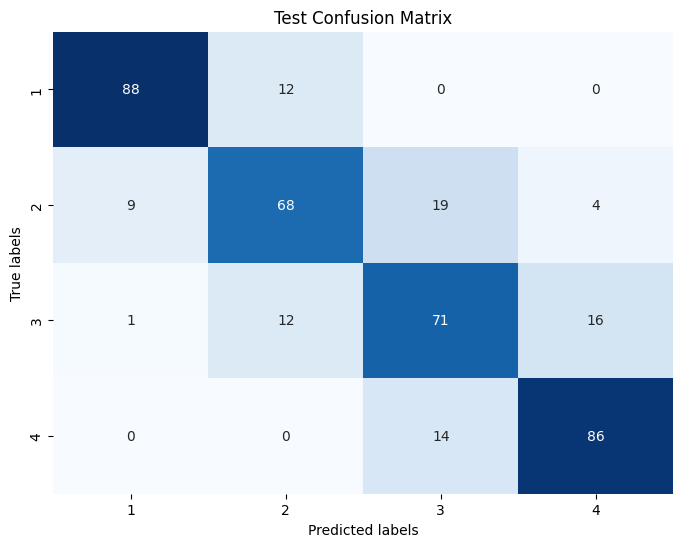

In [ ]:
# Generate and plot confusion matrix for test data
test_cm = confusion_matrix(test_labels, test_predictions)
# Plot the confusion matrix
plot_confusion_matrix(test_cm, class_names, title='Test Confusion Matrix')

In [ ]:
# Save the model to disk
dump(svm_model, 'svm_model1.joblib')

['svm_model1.joblib']

In [ ]:
# [ c 10, gamma 0.1]
# Predict on the training set
train_predictions = svm_model.predict(train_features)

# Evaluate on the training set
train_accuracy = accuracy_score(train_labels, train_predictions)
train_recall = recall_score(train_labels, train_predictions, average='macro')
train_precision = precision_score(train_labels, train_predictions, average='macro')
train_f1 = f1_metric(train_labels, train_predictions, average='macro')

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training Recall: {train_recall:.4f}')
print(f'Training Precision: {train_precision:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

# Predict on the validation set
val_predictions = svm_model.predict(val_features)

# Evaluate on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
val_recall = recall_score(val_labels, val_predictions, average='macro')
val_precision = precision_score(val_labels, val_predictions, average='macro')
val_f1 = f1_metric(val_labels, val_predictions, average='macro')

print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation Recall: {val_recall:.4f}')
print(f'Validation Precision: {val_precision:.4f}')
print(f'Validation F1 Score: {val_f1:.4f}')

# Predict on the test set
test_predictions = svm_model.predict(test_features)

# Evaluate on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
test_recall = recall_score(test_labels, test_predictions, average='macro')
test_precision = precision_score(test_labels, test_predictions, average='macro')
test_f1 = f1_metric(test_labels, test_predictions, average='macro')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Training Accuracy: 0.8669
Training Recall: 0.8669
Training Precision: 0.8663
Training F1 Score: 0.8662
Validation Accuracy: 0.8100
Validation Recall: 0.8100
Validation Precision: 0.8076
Validation F1 Score: 0.8076
Test Accuracy: 0.7950
Test Recall: 0.7950
Test Precision: 0.7948
Test F1 Score: 0.7946


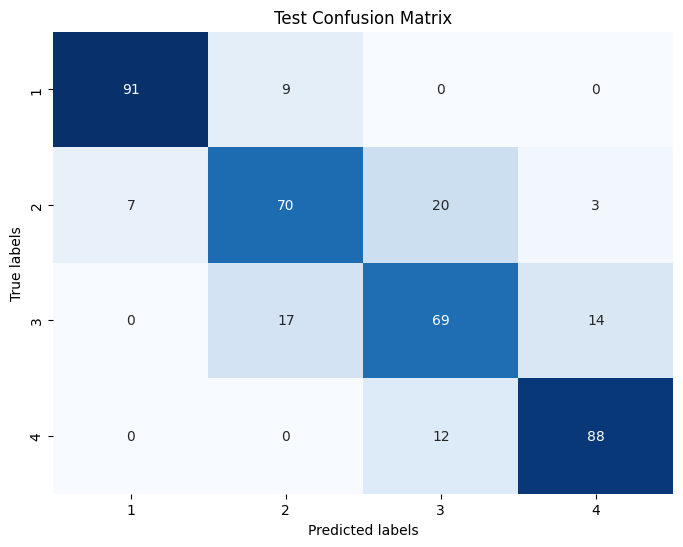

In [ ]:
# Generate and plot confusion matrix for test data
test_cm = confusion_matrix(test_labels, test_predictions)
# Plot the confusion matrix
plot_confusion_matrix(test_cm, class_names, title='Test Confusion Matrix')

In [ ]:
# Save the model to disk
dump(svm_model, 'svm_model2.joblib')

['svm_model2.joblib']

In [ ]:
svm_model = SVC(kernel='poly', C=10, gamma=0.1)
svm_model.fit(train_features, train_labels)

SVC(C=10, gamma=0.1, kernel='poly')

In [ ]:
# [ c 1, gamma 0.1]

# Predict on the training set
train_predictions = svm_model.predict(train_features)

# Evaluate on the training set
train_accuracy = accuracy_score(train_labels, train_predictions)
train_recall = recall_score(train_labels, train_predictions, average='macro')
train_precision = precision_score(train_labels, train_predictions, average='macro')
train_f1 = f1_metric(train_labels, train_predictions, average='macro')

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training Recall: {train_recall:.4f}')
print(f'Training Precision: {train_precision:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

# Predict on the validation set
val_predictions = svm_model.predict(val_features)

# Evaluate on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
val_recall = recall_score(val_labels, val_predictions, average='macro')
val_precision = precision_score(val_labels, val_predictions, average='macro')
val_f1 = f1_metric(val_labels, val_predictions, average='macro')

print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation Recall: {val_recall:.4f}')
print(f'Validation Precision: {val_precision:.4f}')
print(f'Validation F1 Score: {val_f1:.4f}')

# Predict on the test set
test_predictions = svm_model.predict(test_features)

# Evaluate on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
test_recall = recall_score(test_labels, test_predictions, average='macro')
test_precision = precision_score(test_labels, test_predictions, average='macro')
test_f1 = f1_metric(test_labels, test_predictions, average='macro')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Training Accuracy: 0.8631
Training Recall: 0.8631
Training Precision: 0.8635
Training F1 Score: 0.8626
Validation Accuracy: 0.8075
Validation Recall: 0.8075
Validation Precision: 0.8067
Validation F1 Score: 0.8056
Test Accuracy: 0.8025
Test Recall: 0.8025
Test Precision: 0.8033
Test F1 Score: 0.8024


In [ ]:
# Save the model to disk
dump(svm_model, 'svm_model3.joblib')

['svm_model3.joblib']

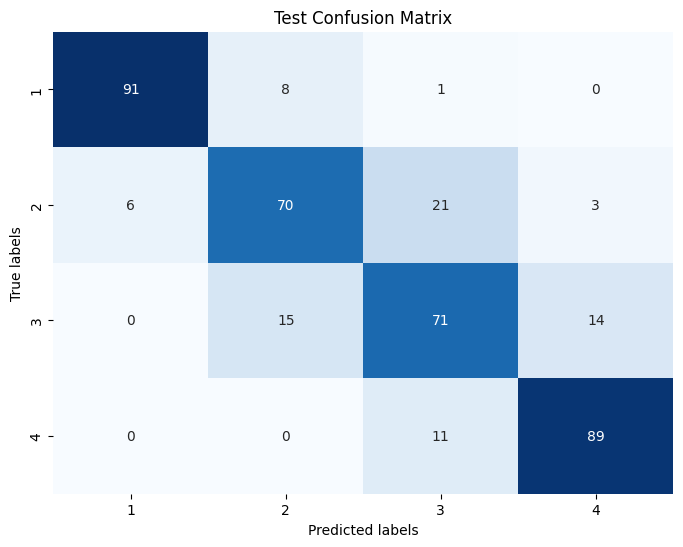

In [ ]:
# Generate and plot confusion matrix for test data
test_cm = confusion_matrix(test_labels, test_predictions)
# Plot the confusion matrix
plot_confusion_matrix(test_cm, class_names, title='Test Confusion Matrix')

In [ ]:
# [ c 10, gamma 0.1]

# Predict on the training set
train_predictions = svm_model.predict(train_features)

# Evaluate on the training set
train_accuracy = accuracy_score(train_labels, train_predictions)
train_recall = recall_score(train_labels, train_predictions, average='macro')
train_precision = precision_score(train_labels, train_predictions, average='macro')
train_f1 = f1_metric(train_labels, train_predictions, average='macro')

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training Recall: {train_recall:.4f}')
print(f'Training Precision: {train_precision:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

# Predict on the validation set
val_predictions = svm_model.predict(val_features)

# Evaluate on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
val_recall = recall_score(val_labels, val_predictions, average='macro')
val_precision = precision_score(val_labels, val_predictions, average='macro')
val_f1 = f1_metric(val_labels, val_predictions, average='macro')

print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation Recall: {val_recall:.4f}')
print(f'Validation Precision: {val_precision:.4f}')
print(f'Validation F1 Score: {val_f1:.4f}')

# Predict on the test set
test_predictions = svm_model.predict(test_features)

# Evaluate on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
test_recall = recall_score(test_labels, test_predictions, average='macro')
test_precision = precision_score(test_labels, test_predictions, average='macro')
test_f1 = f1_metric(test_labels, test_predictions, average='macro')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Training Accuracy: 0.9822
Training Recall: 0.9822
Training Precision: 0.9822
Training F1 Score: 0.9822
Validation Accuracy: 0.8100
Validation Recall: 0.8100
Validation Precision: 0.8129
Validation F1 Score: 0.8112
Test Accuracy: 0.7825
Test Recall: 0.7825
Test Precision: 0.7875
Test F1 Score: 0.7845


In [ ]:
# Save the model to disk
dump(svm_model, 'svm_model4.joblib')

['svm_model4.joblib']

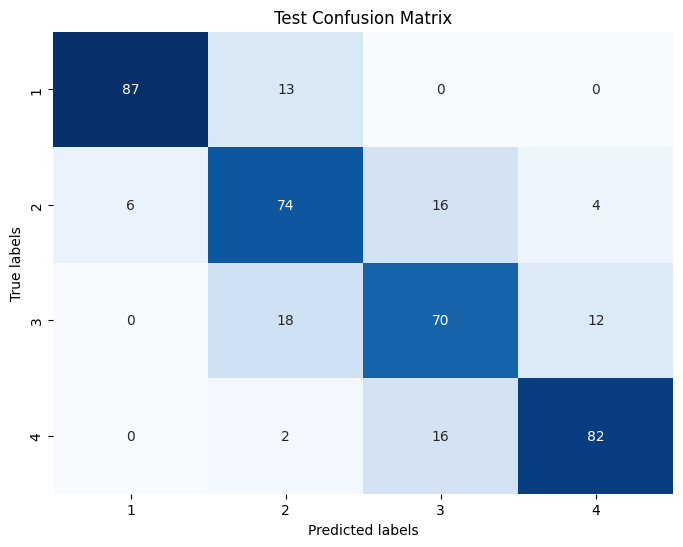

In [ ]:
# Generate and plot confusion matrix for test data
test_cm = confusion_matrix(test_labels, test_predictions)
# Plot the confusion matrix
plot_confusion_matrix(test_cm, class_names, title='Test Confusion Matrix')